In [47]:
%reset -f
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
print os.getcwd()

/Users/yxchen/PycharmProjects/copra_hw_port36/models/NA_direct_nonSAPHANA_apprved


In [48]:
#x = pd.read_csv('./quote_df.csv')
#using testing data
x = pd.read_csv('./quote_df_test.csv')

In [49]:
x = x.loc[(x['winloss'] == 1) & (x['year'] == 2017),:]

In [50]:
x['discount'] = 1 - x['quoted_price'] / x['list_price']
x['op_discount'] = 1 - x['bot_spread_OP'] / x['list_price']
x['act_op_disc'] = x['discount'] - x['op_discount']

In [51]:
x['bot_op_act'] = x['bot_spread_OP'] / x['quoted_price'] - 1
x['line_op_act'] = x['price_opt'] / x['quoted_price'] - 1

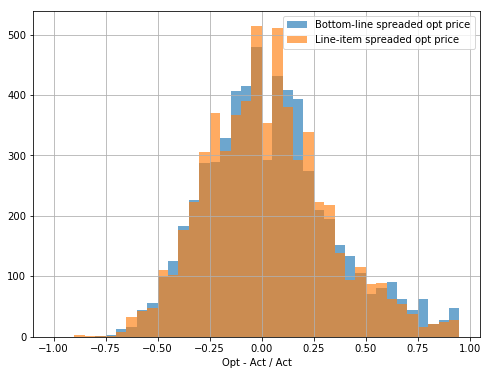

In [52]:
plt.figure(figsize=(8,6))
x['bot_op_act'].hist(bins=np.arange(-1,1,0.05),alpha=0.65, label='Bottom-line spreaded opt price')
x['line_op_act'].hist(bins=np.arange(-1,1,0.05),alpha=0.65, label='Line-item spreaded opt price')
plt.legend()
plt.xlabel('Opt - Act / Act')
plt.show()

In [53]:
x['bot_op_act'].describe()

count    6382.000000
mean        0.114994
std         0.541395
min        -0.780974
25%        -0.160861
50%         0.036435
75%         0.251244
max        17.088315
Name: bot_op_act, dtype: float64

In [54]:
x['line_op_act'].describe()

count    6382.000000
mean        0.098449
std         0.478110
min        -0.862625
25%        -0.174689
50%         0.024517
75%         0.236740
max         7.922378
Name: line_op_act, dtype: float64

In [55]:
print 'value-score mape = ',np.mean(np.abs(x['value_score']/x['quoted_price']-1))
print 'opt-price mape = ',np.mean(np.abs(x['bot_spread_OP'] /x['quoted_price']-1))

value-score mape =  0.273971139511
opt-price mape =  0.308187585742


In [56]:
# from MF latest training
mf = pd.read_csv('/Users/yxchen/Box Sync/Cognitive Pricing/COPRA_HW/WorkStreams/NA_Pricing/Data/Sample_data/YuxiTestNA_oldprodmap_0306_BPEndUser_NonSAPHana/ExPost_ComponentOut_NA_201612_201803.csv')

In [57]:
mf['discount'] = 1 - mf['ComQuotePrice'] / mf['ComListPrice']
mf['op_discount'] = 1 - mf['DealBotLineSpreadOptimalPrice'] / mf['ComListPrice']
mf['act_op_disc'] = mf['discount'] - mf['op_discount']

In [58]:
mf = mf.loc[(mf['WinLoss'] == 1) &(mf['Indirect(1/0)'] == 0),:]

In [59]:
mf = mf.loc[mf['Year'] == 2017,:]

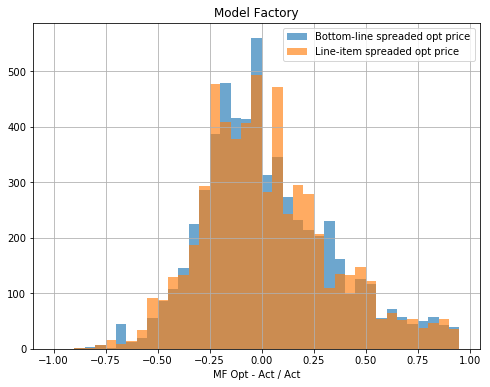

In [60]:
mf['bot_op_act'] = mf['DealBotLineSpreadOptimalPrice'] / mf['ComQuotePrice'] - 1
mf['line_op_act'] = mf['ComOptimalPrice'] / mf['ComQuotePrice'] - 1
plt.figure(figsize=(8,6))
mf['bot_op_act'].hist(bins=np.arange(-1,1,0.05),alpha=0.65, label='Bottom-line spreaded opt price')
mf['line_op_act'].hist(bins=np.arange(-1,1,0.05),alpha=0.65, label='Line-item spreaded opt price')
plt.legend()
plt.xlabel('MF Opt - Act / Act')
plt.title('Model Factory')
plt.show()

In [61]:
mf['bot_op_act'].describe()

count    6349.000000
mean        0.114705
std         0.491622
min        -0.874902
25%        -0.179305
50%        -0.003560
75%         0.285116
max         6.925568
Name: bot_op_act, dtype: float64

In [62]:
mf['line_op_act'].describe()

count    6349.000000
mean        0.111888
std         0.491943
min        -0.874902
25%        -0.189852
50%         0.002875
75%         0.255053
max         6.937876
Name: line_op_act, dtype: float64

In [63]:
print 'MF value-score mape = ',np.mean(np.abs(mf['PredictedQuotePrice']/mf['ComQuotePrice']-1))
print 'MF opt-price mape = ',np.mean(np.abs(mf['DealBotLineSpreadOptimalPrice'] /mf['ComQuotePrice']-1))

MF value-score mape =  0.305884934703
MF opt-price mape =  0.318994681157


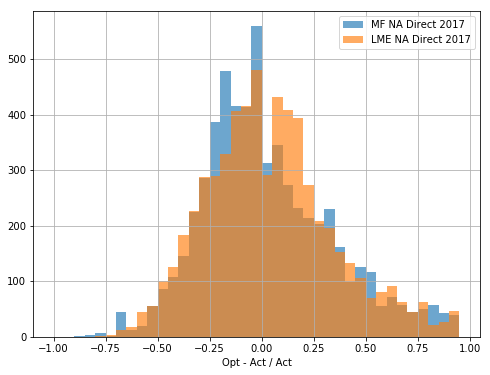

In [64]:
## high-level comparing MF results and LME results, direct:
plt.figure(figsize=(8,6))
mf['bot_op_act'].hist(bins=np.arange(-1,1,0.05),alpha=0.65, label='MF NA Direct 2017')
x['bot_op_act'].hist(bins=np.arange(-1,1,0.05),alpha=0.65, label='LME NA Direct 2017')
plt.legend()
plt.xlabel('Opt - Act / Act')
plt.show()

1 1
2 1
3 1
4 1
5 1


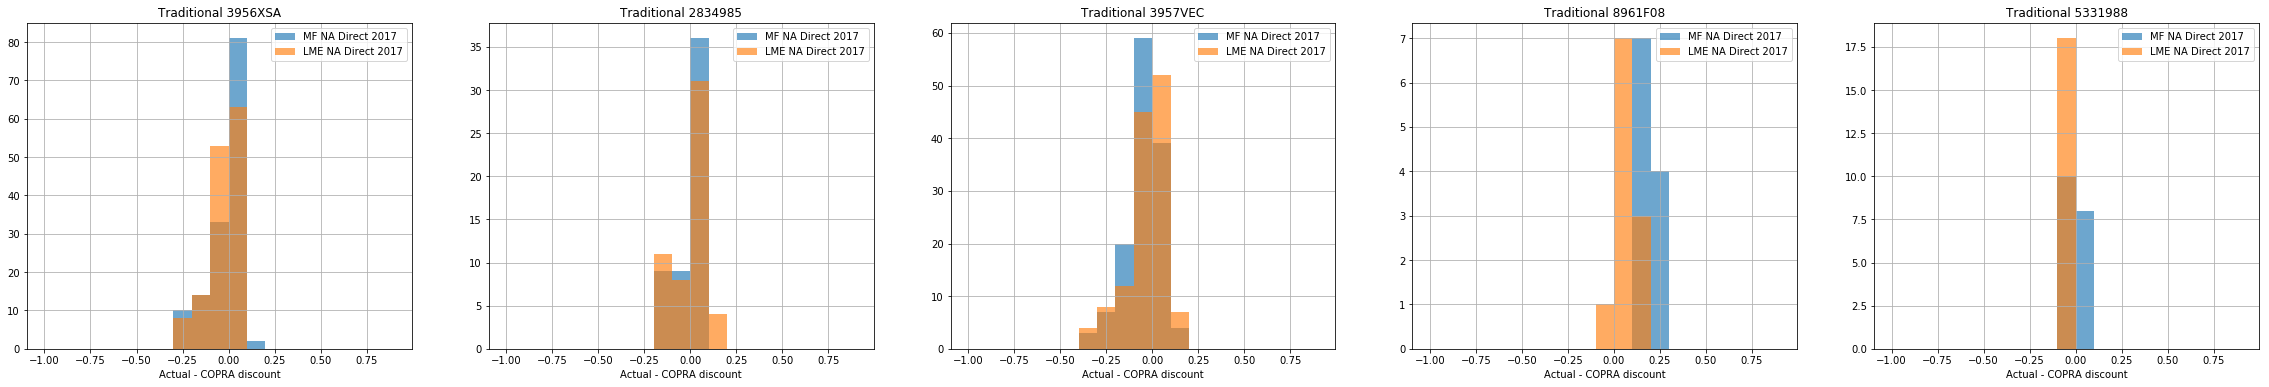

In [66]:
# mtm = ['9080MHE', '828422A', '9119MME', '8335GTB', '840844E']
mtm = ['3956XSA', '2834985', '3957VEC', '8961F08', '5331988']
hana = pd.read_csv('../../data/NA_direct_nonSAPHANA_apprved/SAPHana2017.csv')
qid = hana.QUOTEID.unique()
plt.figure(figsize=(40,6))
# plt.figure()
row = 1
col = 1
for m in mtm:
    print col, row
    old_m = m+'a'
    new_m = m+'_0'
    plt.subplot(row,5,col)
    mf_m = mf.loc[(mf['ComMTM'] == old_m) &(~mf['QuoteID'].isin(qid)),:]
    x_m = x.loc[(x['lvl1'] == new_m) & (~x['quoteid'].isin(qid)),:]
#     mf_m['bot_op_act'].hist(bins=np.arange(-1,1,0.05),alpha=0.65, label='MF NA Direct 2017')
#     x_m['bot_op_act'].hist(bins=np.arange(-1,1,0.05),alpha=0.65, label='LME NA Direct 2017')
    mf_m['act_op_disc'].hist(bins=np.arange(-1,1,0.1),alpha=0.65, label='MF NA Direct 2017')
    x_m['act_op_disc'].hist(bins=np.arange(-1,1,0.1),alpha=0.65, label='LME NA Direct 2017')
    plt.legend()
    plt.xlabel('Actual - COPRA discount')
    plt.title('Traditional '+m)
    if col < 5:
        col = col + 1
    else:
        col = 1
        row = row + 1
plt.show()